In [13]:
from f3dasm.simulation.benchmark_functions import Levy, Ackley, Schwefel
from f3dasm.optimization.pygmo_implementations import CMAES, PSO
from f3dasm.optimization.gradient_based_algorithms import SGD, Momentum, Adam
from f3dasm.base.designofexperiments import DesignSpace
from f3dasm.base.space import ContinuousParameter
from f3dasm.sampling.latinhypercube import LatinHypercubeSampling

In [14]:
def make_nd_continuous_design(bounds: list, dimensions: int):
    input_space, output_space = [], []
    for dim in range(dimensions):
        input_space.append(ContinuousParameter(name=f"x{dim}", lower_bound=bounds[0], upper_bound=bounds[1]))

    output_space.append(ContinuousParameter(name="y"))

    return DesignSpace(input_space=input_space, output_space=output_space)

In [15]:
seed = 42
population = 30 # Population 
dimensions= 2

iterations = 20

In [16]:
design = make_nd_continuous_design(bounds=[-10.,10.], dimensions=dimensions)

# Sampler
lhs_sampler = LatinHypercubeSampling(doe=design, seed=seed)
data = lhs_sampler.get_samples(numsamples=population)


In [17]:
# algorithm = pg.algorithm(pg.cmaes(gen=1, memory=True, seed=42, force_bounds=True))
sgd = PSO(data=data,seed=seed,population=population)
levy = Levy(noise=False)

# Evaluate the initial samples
data.add_output(output=levy.eval(data),label="y")
data.data


input               output
          x0        x1          y
0   2.203076 -3.240337   2.807559
1  -7.961278  5.680045  10.862077
2  -6.652944 -7.422549  43.294078
3  -8.845337  1.872265  18.566415
4  -6.932590  2.065115  33.768357
5  -3.712037 -1.476549   4.755916
6   7.313056 -6.020060  12.127293
7   8.398600  7.929885  18.268522
8   9.363485  8.797322  48.877373
9  -1.200217 -3.805847   5.374564
10  0.710034 -0.990510   0.329502
11 -8.562654  4.606214  10.590401
12 -2.925431 -0.635700   8.499906
13  4.022926  3.663451   2.130571
14 -5.212117  1.299257  14.294572
15 -2.471904  5.108348   9.352832
16  3.122822  2.960102   2.101001
17  4.839187  7.183422   8.934938
18 -5.445038  6.123236  23.140543
19 -9.750307 -8.562670  76.644567
20  6.364474 -6.861285  20.451381
21  7.959666  0.113683   4.657333
22 -4.463839 -9.366190  11.817504
23  8.725662 -8.934228  28.629370
24  5.541141 -2.422425  15.262037
25  3.414692 -5.211064   4.143143
26 -0.271724  9.550220   8.020731
27  1.977088 -5.858441   6.852392
28 -1.695953  8.614583   9.652668
29  0.405030 -4.316829   3.413053

In [18]:
sgd.iterate(iterations=iterations, function=levy)
new_data = sgd.extract_data()

In [19]:
new_data.data

input               output
           x0        x1          y
0    2.203076 -3.240337   2.807559
1   -7.961278  5.680045  10.862077
2   -6.652944 -7.422549  43.294078
3   -8.845337  1.872265  18.566415
4   -6.932590  2.065115  33.768357
..        ...       ...        ...
625  1.310992 -0.053890   0.257094
626 -0.970872  0.411257   1.936482
627  0.610846  0.896263   0.139455
628  1.366120 -1.385417   0.636864
629  0.957037  1.218181   0.005346

[630 rows x 3 columns]

In [20]:
new_data.get_output_data().idxmin()

y    555
dtype: int64

In [21]:
g = new_data.get_output_data().to_numpy().ravel()

In [22]:
new_data.get_n_best_output_samples(nosamples=10)

input              output
           x0        x1         y
555  1.006755  0.841697  0.001712
585  1.006755  0.841697  0.001712
615  1.006755  0.841697  0.001712
569  0.957037  1.218181  0.005346
599  0.957037  1.218181  0.005346
629  0.957037  1.218181  0.005346
195  1.024340  0.708207  0.007034
225  1.024340  0.708207  0.007034
255  1.024340  0.708207  0.007034
285  1.024340  0.708207  0.007034

In [23]:
len(new_data.data)

630

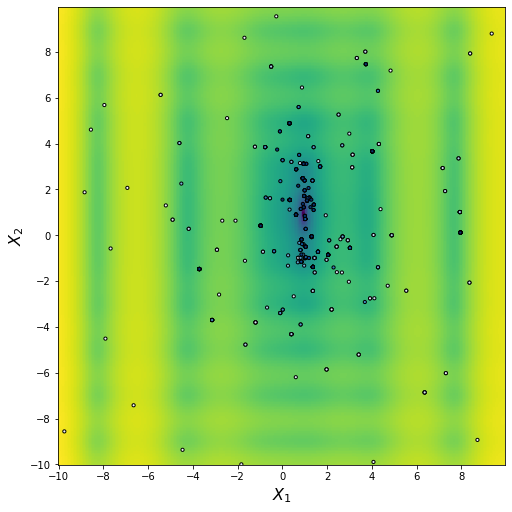

In [24]:
levy.plot_data(data=new_data, px=300, domain=[-10.,10.])